# **Judul : Prediksi Pasien Terkena Penyakit HIV (Human Immunodeficiency Virus) Dengan Implementasi Algoritma K-Nearest Neighbor (KNN) Studi Kasus: RSUD dr. Chasbullah Abdul madjid Kota Bekasi**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('Laporan_HIV_Encoded.csv')
data.head()

,No,Umur,Jenis Kelamin,Kelompok Populasi,Alasan Kunjungan,Status ODHIV
0,1,62,1,21,4,1
1,2,33,0,21,4,1
2,3,57,0,17,4,1
3,4,56,0,17,4,1
4,5,44,1,17,4,1


In [3]:
data.tail()

,No,Umur,Jenis Kelamin,Kelompok Populasi,Alasan Kunjungan,Status ODHIV
2200,"2,201",34,0,21,0,2
2201,"2,202",40,0,21,0,2
2202,"2,203",30,0,6,0,2
2203,"2,204",35,0,6,0,2
2204,"2,205",28,0,6,0,2


In [4]:
# Total label yang ada
data['Status ODHIV'].value_counts()

,count
Status ODHIV,
2,1562
1,631
0,12


In [5]:
# Mengecek jumlah missing values per kolom
missing_values = data.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

# Mengecek apakah ada missing values di dataset
total_missing = data.isnull().sum().sum()
print("\nTotal missing values di dataset:", total_missing)

# Menampilkan persentase missing values per kolom
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPersentase missing values per kolom:\n", missing_percentage)

Jumlah missing values per kolom:
 No                   0
Umur                 0
Jenis Kelamin        0
Kelompok Populasi    0
Alasan Kunjungan     0
Status ODHIV         0
dtype: int64

Total missing values di dataset: 0

Persentase missing values per kolom:
 No                   0.0
Umur                 0.0
Jenis Kelamin        0.0
Kelompok Populasi    0.0
Alasan Kunjungan     0.0
Status ODHIV         0.0
dtype: float64


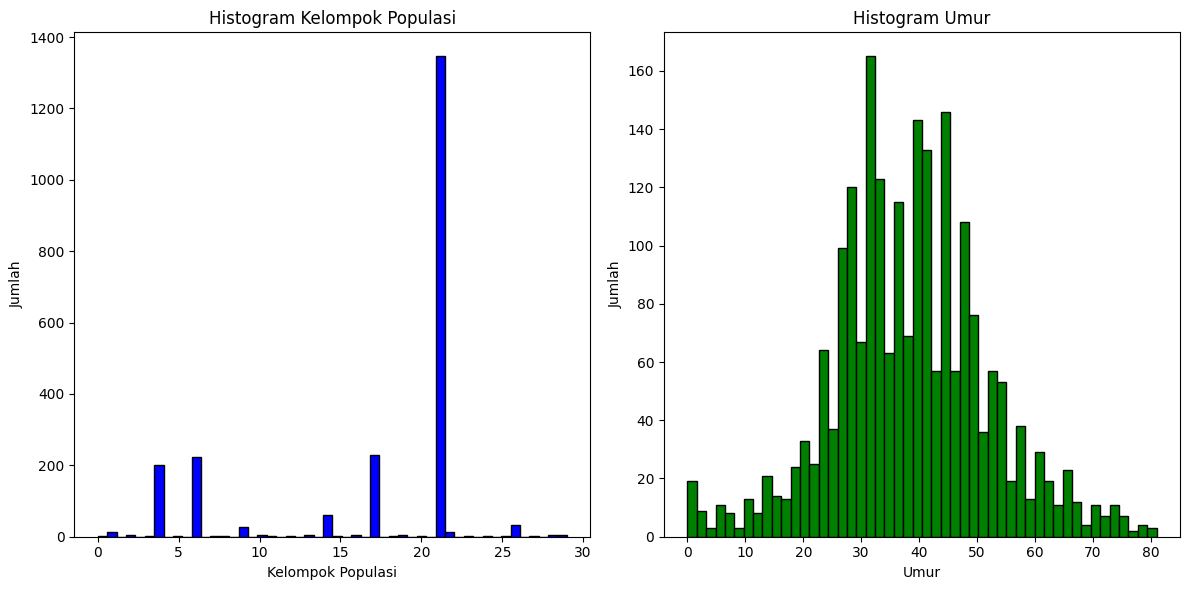

In [6]:
# Membuat plot dengan dua histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 baris, 2 kolom

# Histogram untuk 'Kelompok Populasi'
axes[0].hist(data['Kelompok Populasi'], bins=50, color='blue', edgecolor='black')
axes[0].set_title('Histogram Kelompok Populasi')
axes[0].set_xlabel('Kelompok Populasi')
axes[0].set_ylabel('Jumlah')

# Histogram untuk 'Umur'
axes[1].hist(data['Umur'], bins=50, color='green', edgecolor='black')
axes[1].set_title('Histogram Umur')
axes[1].set_xlabel('Umur')
axes[1].set_ylabel('Jumlah')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [7]:
# Pemisahan dataset Fitur dan Label
x = data.iloc[:, 0:-1].values # Array Fitur
y = data.iloc[:, -1].values # Array Label

In [8]:
x[0:5]

array([['1', 62, 1, 21, 4],
       ['2', 33, 0, 21, 4],
       ['3', 57, 0, 17, 4],
       ['4', 56, 0, 17, 4],
       ['5', 44, 1, 17, 4]], dtype=object)

In [9]:
y[0:5]

array([1, 1, 1, 1, 1])

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['Umur', 'Jenis Kelamin', 'Kelompok Populasi', 'Alasan Kunjungan', 'Status ODHIV']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data

,No,Umur,Jenis Kelamin,Kelompok Populasi,Alasan Kunjungan,Status ODHIV
0,1,0.765432,1.0,0.724138,0.5,0.5
1,2,0.407407,0.0,0.724138,0.5,0.5
2,3,0.703704,0.0,0.586207,0.5,0.5
3,4,0.691358,0.0,0.586207,0.5,0.5
4,5,0.543210,1.0,0.586207,0.5,0.5
...,...,...,...,...,...,...
2200,"2,201",0.419753,0.0,0.724138,0.0,1.0
2201,"2,202",0.493827,0.0,0.724138,0.0,1.0
2202,"2,203",0.370370,0.0,0.206897,0.0,1.0
2203,"2,204",0.432099,0.0,0.206897,0.0,1.0


In [11]:
# Pembagian Data Training (75%) dan Testing (25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

print("Data Training :", x_train.shape, y_train.shape)
print("Data Testing :", x_test.shape, y_test.shape)

Data Training : (1653, 5) (1653,)
Data Testing : (552, 5) (552,)


In [14]:
K = 3
knn = KNeighborsClassifier(n_neighbors=K).fit(x_train, y_train)
print(knn)

ValueError: could not convert string to float: '1,435'

In [ ]:
# Melakukan Prediksi
prediksi = knn.predict(x_test)
print("Hasil prediksi 5 data pertama:", prediksi[0:5])
print("Seluruh hasil prediksi:", prediksi)

In [ ]:
# Perhitungan Akurasi
training = metrics.accuracy_score(y_train, knn.predict(x_train))
testing = metrics.accuracy_score(y_test, prediksi)

print("Akurasi Training:", training, "(%0.2f" % (training * 100), "%)")
print("Akurasi Testing:", testing, "(%0.2f" % (testing * 100), "%)")

In [ ]:
# Pengujian nilai K dari K = 1 s.d K = 20 untuk mendapatkan K Optimal
K1 = 20
mean = np.zeros((K1 - 1))
std = np.zeros((K1 - 1))
for i in range(1, K1):
  knn1 = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
  prediksi1 = knn1.predict(x_test)
  mean[i - 1] = metrics.accuracy_score(y_test, prediksi1)
  std[i - 1] = np.std(prediksi1 == y_test) / np.sqrt(y_test.shape[0])

mean

In [ ]:
plt.plot(range(1, K1), mean, 'g')
plt.fill_between(range(1, K1), mean - 1 * std, mean + 1 * std, alpha=0.10)

plt.legend(('Akurasi', '+/- 3xstd'))
plt.ylabel('Akurasi')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

print('Nilai K optimal pada K =', mean.argmax() + 1, 'dengan akurasi %0.2f' % (mean.max() * 100), '%')

In [ ]:
# Percobaan prediksi menggunakan nilai K optimal
K = mean.argmax() + 1

sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=K).fit(x_train, y_train)

# [Umur, Jenis Kelamin, Kelompok Populasi, Alasan Kunjungan]
print(knn.predict(sc.transform([[22, 0, 21, 1]])))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, prediksi)

# Label untuk heatmap
labels = ['ODHIV', 'Bukan ODHIV', 'Belum Tahu']

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Hitung metrik tambahan
accuracy = accuracy_score(y_test, prediksi)
precision = precision_score(y_test, prediksi, average='weighted')  # Gunakan average sesuai kebutuhan
recall = recall_score(y_test, prediksi, average='weighted')
f1 = f1_score(y_test, prediksi, average='weighted')

# Tampilkan hasil metrik tambahan
print("Metrik Tambahan:")
print(f"Akurasi    : {accuracy:.2f}")
print(f"Precision  : {precision:.2f}")
print(f"Recall     : {recall:.2f}")
print(f"F1-Score   : {f1:.2f}")

In [ ]:
from sklearn.metrics import classification_report

# Cetak classification report
labels = ['ODHIV', 'Bukan ODHIV', 'Belum Tahu']
print("Classification Report:")
print(classification_report(y_test, prediksi, target_names=labels))